# EI2001: Ciencia de Datos en Astronomía

**Profesores:** Pía Cortés, Daniela Barrientos, Matías Suazo, Matías Mattamala

## Minitarea 2: Uso de NumPy y matplotlib

**Objetivos:**

1. Poner en práctica el uso de librerías en python (específicamente NumPy y matplotlib)
2. Familiarizarse con el concepto de ndarray
3. Realizar gráficos personalizados


**Instrucciones:**

1. Lean cuidadosamente todo lo que viene ahora
2. Para hacer esta tarea deben que hacer un **fork** del repositorio en sus cuentas de GitHub.
4. Abrir [Google Colab](https://colab.research.google.com) y seleccionar "abrir un archivo desde GitHub". Deben seleccionar su cuenta Github y escoger el repositorio que corresponde al fork que hicieron.
5. Si todo sale bien, debería abrirse una copia de este notebook en su cuenta de Google Colab.
6. Se adjuntan 6 mini actividades a completar. **TODAS** son necesarias y deben completar lo que se va pidiendo.
7. Cada vez que completen un ítem, deben guardar un avance en su fork de GitHub, de modo de **respaldar cada avance significativo**. Usen comentarios coherentes con cada respaldo "Sección 1 completa", "Tarea terminada", no solamente el que pone por defecto.



## 1. Cargar datos

Para esta minitarea trabajaremos con la fotometría de algunas estrellas. El objetivo final de esta actividad es obtener un gráfico llamado **Diagrama de Color-Magnitud (CMD)**, este es una variante del [Diagrama de Hertzsprung Russell](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) (o diagrama HR) cuyo objetivo es ver la distribución en Brillo y Color (Luminosidad y Temperatura para el diagrama HR) de las estrellas de una población. Con este se puede reconocer las distintas etapas evolutivas en las que se encuentran las estrellas, sus edades y metalicidades. 


Comienza por cargar los datos de una población sintética. En el repositorio se encuentra el archivo de texto llamado **`phot.dat`** que contiene:

1. Fotometría en las bandas B, V, R, I (magnitud aparente)
2. Temperatura ($log_{10}(T_{eff} / K)$)
3. Masa [$M_{\odot}$]
4. Distancia [kpc] 


* Carga los datos a formato `ndarray` en la variable `datos` e inspecciona su forma y tamaño, como tambien las diferentes columnas.

In [6]:
import numpy as np

# Carga los datos a un ndarray

archivo = 'https://raw.githubusercontent.com/astrodatos/minitarea2/master/phot.dat'
datos = np.loadtxt(archivo)

# Inspecciona su forma y tamaño

print('Array datos:\n{}'.format(datos))
print('\nForma:\n{}'.format(datos.shape))
print('\nTamaño:\n{}'.format(datos.size))
print('\nNúmero de Dimensiones:\n{}'.format(datos.ndim))
print('\nTipo de Dato:\n{}'.format(datos.dtype))

Array datos:
[[1.43318972 0.55800856 0.23628573 ... 3.7514     1.263      2.92588428]
 [3.05953348 2.22205699 1.78027236 ... 3.7411     0.972      3.02311363]
 [1.57848745 0.76497844 0.51246246 ... 3.7681     1.227      2.83983097]
 ...
 [4.79977225 4.00696032 3.57323265 ... 3.7436     0.986      7.2987171 ]
 [5.45884546 4.47140036 4.05807828 ... 3.7208     0.926      6.15482424]
 [4.23992507 3.45563476 3.01565666 ... 3.7461     1.002      6.01632559]]

Forma:
(5298, 7)

Tamaño:
37086

Número de Dimensiones:
2

Tipo de Dato:
float64


## 2. Histogramas

El siguiente paso es inspeccionar los elementos en las diferentes columnas. Para ello crearás histogramas de algunas variables de interés. 

* Haz una figura con dos gráficos, uno al lado del otro, que contengan:

    1. Un histograma con las distribuciones de las magnitudes en las bandas B y V
    2. Un histograma con la distribución de masas

No olvides poner nombres a los ejes, titulos, leyendas, etc. Se creativo en el estilo de tu gráfico!

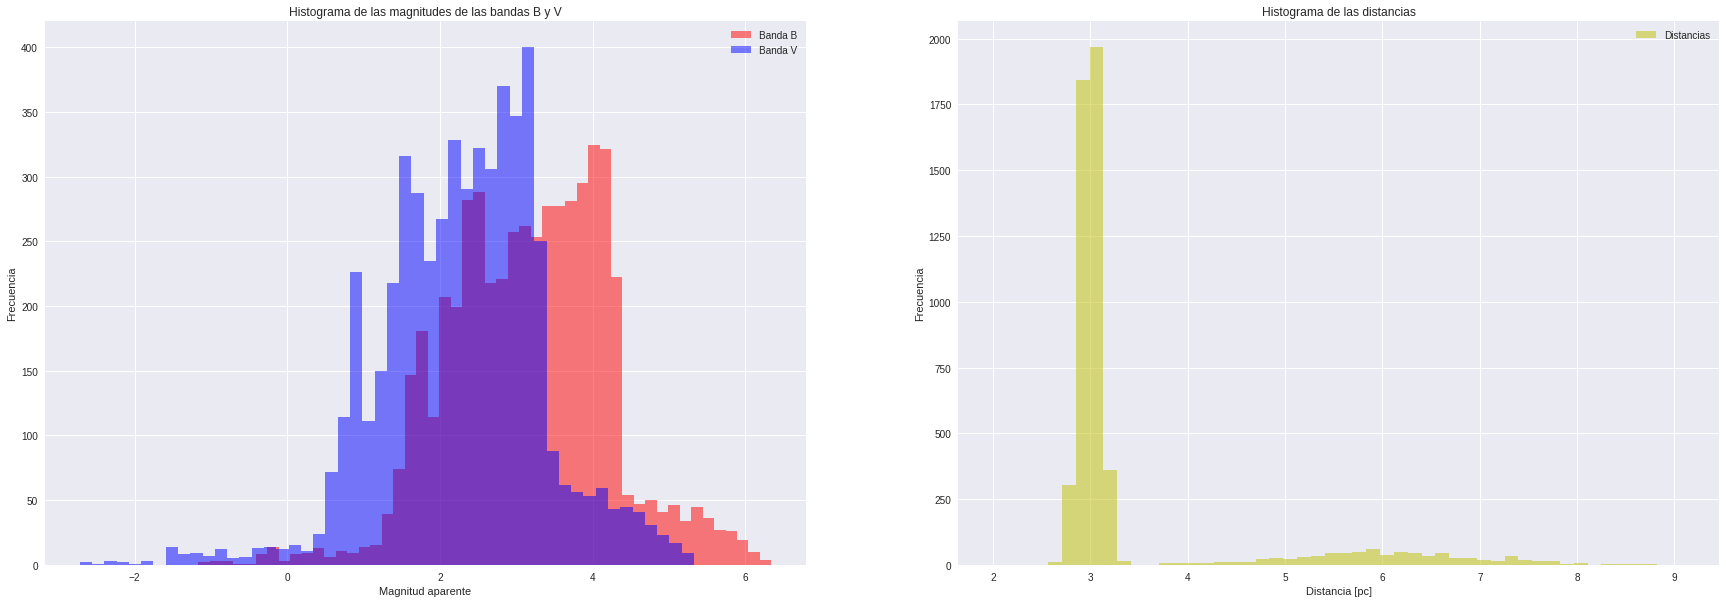

In [7]:
# Plotear histogramas de cada columna

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(30,10), ncols=2)

banda_b = datos[:,0]
banda_v = datos[:,1]
log_T = datos[:,4]
masas = datos[:,5]
distancia_pc = datos[:,6]
temp_K = 10**log_T

ax[0].hist(banda_b, color='r', label='Banda B', alpha=0.5, bins=50)
ax[0].hist(banda_v, color='b', label='Banda V', alpha=0.5, bins=50)
ax[0].set_title('Histograma de las magnitudes de las bandas B y V')
ax[0].set_xlabel('Magnitud aparente')
ax[0].set_ylabel('Frecuencia')
ax[0].legend(loc='upper right')

ax[1].hist(distancia_pc, color='y', label='Distancias', alpha=0.5, bins=50)
ax[1].set_title('Histograma de las distancias')
ax[1].set_xlabel('Distancia [pc]')
ax[1].set_ylabel('Frecuencia')
ax[1].legend(loc='upper right')

## 3. Filtrar datos

Como te habrás dado cuenta hay dos distribuciones de distancia. La mayoría de las estrellas corresponden a la población sintética creada, mientras que el resto son estrellas de fondo. Para estudiar nuestro cúmulo, primero debemos filtrar las estrellas que no pertenecen a él. 

* Haz una copia del set de datos originales en la variable `datos_filtrados` y sólo utiliza las estrellas que cumplan con un criterio basado en el histograma anterior.
* Imprime en pantalla el tamaño original del set de datos y del nuevo filtrado con el siguiente formato: _"El set original contenía X estrellas, luego de filtrar quedaron X"_


In [9]:
# Filtrar por distancia

datos_filtrados = datos[distancia_pc < 3.4].copy()
#datos_filtrados = datos[np.logical_and(distancia_pc < 3.4, distancia_kpc > 2.6)].copy()

print('El set original contenía '+str(datos.shape[0])+' estrellas, luego de filtrar, quedaron '+str(datos_filtrados.shape[0])+' estrellas.')

El set original contenía 5298 estrellas, luego de filtrar, quedaron 4506 estrellas.


## 4. Función Magnitud Absoluta

Para hacer el CMD necesitamos la magnitud absoluta de nuestras estrellas. Para esto crearemos una función que la calcule.

* Crea la función **`mag_abs(mag_ap, dist)`** de la siguiente forma:
    * **Input:** 
        1. `mag_ap`: ndarray de magnitudes aparentes
        2. `dist`: ndarray de distancias en unidades de [parsec]
    * **Output:**
        1. `mag_abs`: ndarray de magnitudes absolutas calculadas como: $M = m - 5 \log_{10} (d_{pc}) + 5 $

In [0]:
import math

#Funcion mag_abs(mag, dist)

def mag_abs(mag_ap, dist):
    mag_abs = mag_ap - 5*np.log(dist)*1/np.log(10) + 5
    return mag_abs

## 5. CMD

Ahora podemos graficar nuestro Diagrama Color Magnitud. 

* Crea los siguientes arreglos:
    1. `MV`: magnitud absoluta en la banda V
    2. `color`: resta entre las magnitudes B y V (B-V)
* Grafica MV vs color como se muestra en la siguiente [figura](https://www.astro.rug.nl/~ahelmi/galaxies_course/class_II/47tuc.gif). (**Hint: pon atención a los ejes)

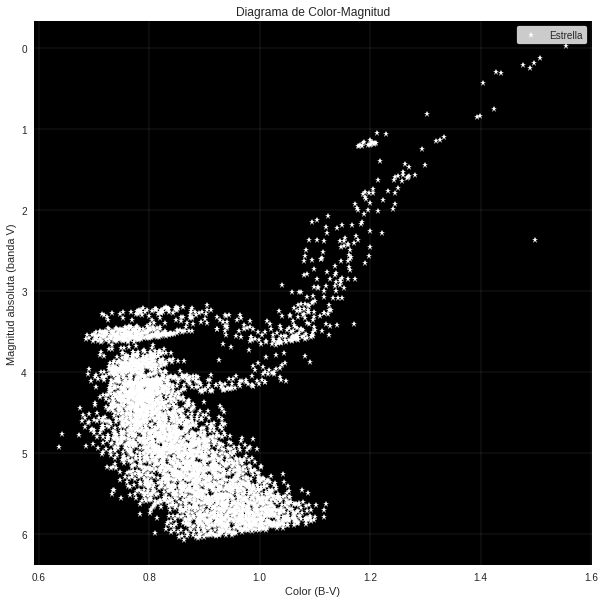

In [12]:
#Crear arrays MV y color

banda_b_filtrada = datos_filtrados[:,0]
banda_v_filtrada = datos_filtrados[:,1]
distancia_kpc_filtrada = datos_filtrados[:,6]

MV = mag_abs(banda_v_filtrada, distancia_kpc_filtrada)

color = banda_b_filtrada - banda_v_filtrada

#plot cmd

fig, ax = plt.subplots(figsize=(10,10), facecolor='white')

plt.rcParams['axes.facecolor'] = 'black'

ax.plot(color, MV, 'w*', label='Estrella')
ax.invert_yaxis()
ax.set_ylabel('Magnitud absoluta (banda V)')
ax.set_xlabel('Color (B-V)')
ax.set_title('Diagrama de Color-Magnitud')
ax.legend(loc='best', frameon=True, facecolor='white')
ax.grid(linewidth=0.1, color='white')

## 6. Densidades y otros

Ahora crearemos gráficos con un poco más de información en color. 
* Haz una figura con dos gráficos, uno al lado del otro:
    1. `MV vs color`, poninedo las masas de cada estrella en color (recuerda la barra de colores)
    2. `MV vs color`, poniendo la Temperatura de cada estrella en color
* Haz una figura con un gráfico que contenga:
    1. [Histograma en 2D](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html) con ejes `MV vs color` (esta figura muestra la densidad de estrellas en el espacio `MV vs color`)
    
No olvides poner **SIEMPRE** ejes a tus figuras, titulos, leyendas, etc. Elige mapas de colores donde se noten las características de los gráficos.

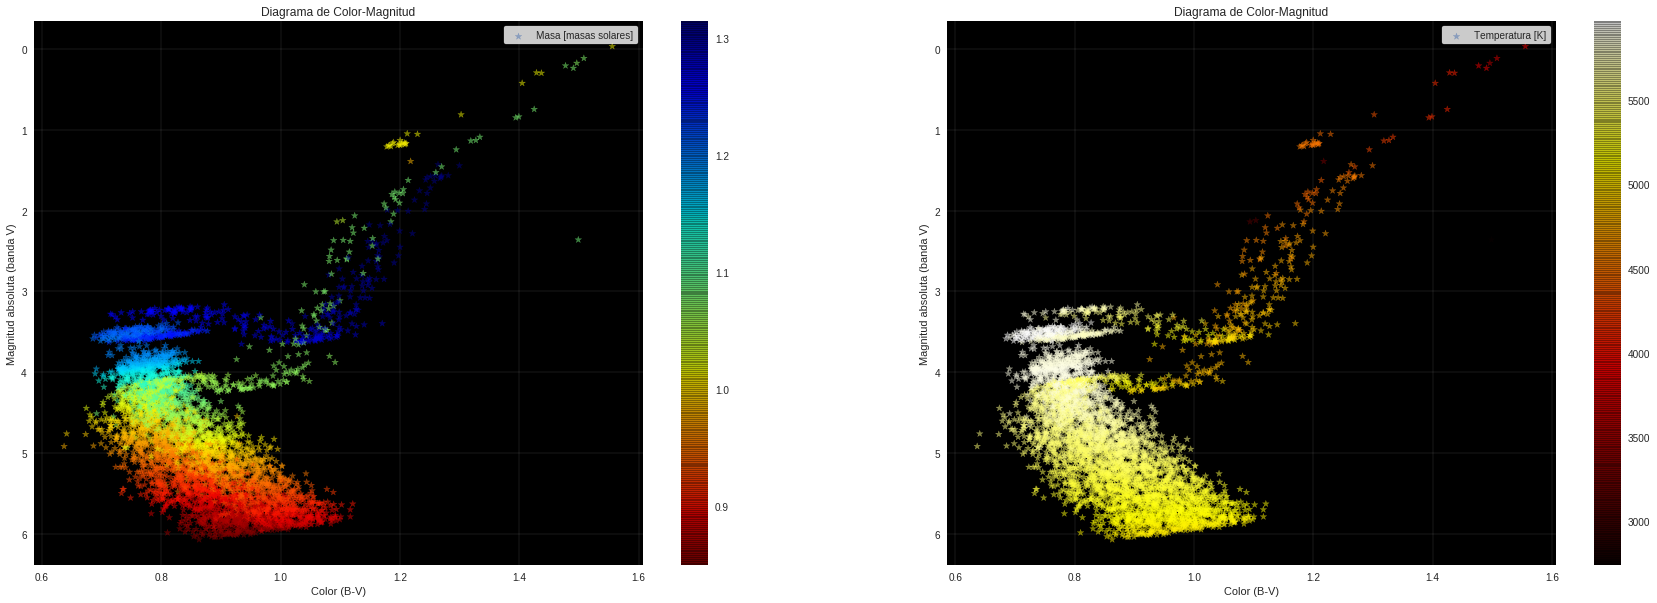

In [13]:
# plot cmd + masa / smd + temp

log_T_filtradas = datos_filtrados[:,4]
temp_K_filtradas = 10**log_T_filtradas
masas_filtradas = datos_filtrados[:,5]

fig, ax = plt.subplots(figsize=(30,10), ncols=2)

cb1 = ax[0].scatter(color, MV, marker='*', label = 'Masa [masas solares]', c=masas_filtradas, alpha=0.5, cmap='jet_r')

fig.colorbar(cb1, ax=ax[0])

ax[0].invert_yaxis()
ax[0].set_ylabel('Magnitud absoluta (banda V)')
ax[0].set_xlabel('Color (B-V)')
ax[0].set_title('Diagrama de Color-Magnitud')
ax[0].legend(loc='best', frameon=True, facecolor='white')
ax[0].grid(linewidth=0.1)

cb2 = ax[1].scatter(color, MV, marker='*', label = 'Temperatura [K]', c=temp_K_filtradas, alpha=0.5, cmap='hot')

fig.colorbar(cb2, ax=ax[1])

ax[1].invert_yaxis()
ax[1].set_ylabel('Magnitud absoluta (banda V)')
ax[1].set_xlabel('Color (B-V)')
ax[1].set_title('Diagrama de Color-Magnitud')
ax[1].legend(loc='best', frameon=True, facecolor='white')
ax[1].grid(linewidth=0.1)

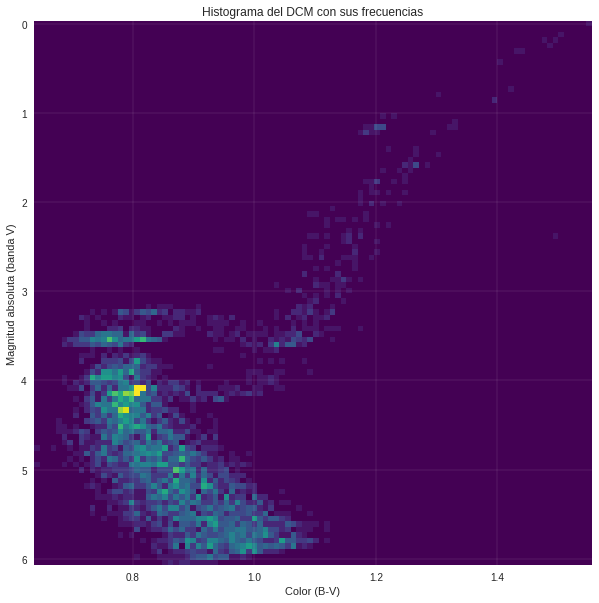

In [14]:
# plot cmd hist2D

fig, ax = plt.subplots(figsize=(10,10))

ax.hist2d(color, MV, bins=100, label='Frecuencia', cmap='viridis')

ax.invert_yaxis()
ax.set_title('Histograma del DCM con sus frecuencias')
ax.set_xlabel('Color (B-V)')
ax.set_ylabel('Magnitud absoluta (banda V)')
ax.grid(linewidth=0.1, color='white')